In [2]:
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('../../../res/credit-card/training.csv')
df = df.drop(columns=["CUST_ID"])

In [5]:
# Scale continuous features to give all features with equal importance
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)


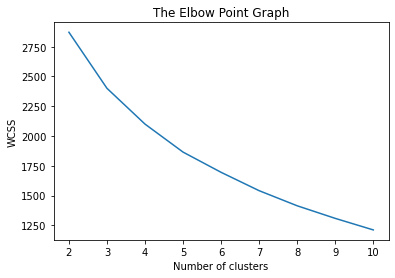

In [6]:

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
wcss = []
kmeans_arr = []
for i in range(2, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
   kmeans.fit(data_transformed)
   kmeans_arr.append(kmeans)
   wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
for n_clusters, kmeans in enumerate(kmeans_arr):
    # Add 2 two n_clusters since enumerate gives index 0 at the beginning
    # but the first Kmeans has 1 centroid
    if n_clusters >= 0:
        n_clusters = n_clusters + 2
   # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])

    cluster_labels = kmeans.predict(data_transformed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(
        data_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
